### 导入库
顺便定义些常量

In [1]:
from helper import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


### 读取图片数据到内存

In [2]:
for i in tqdm(range(n)):
    data = cv2.imread(images_path[i])
    shape = data.shape[:2]
    shapes[i] = shape
    X[i] = cv2.resize(data, (width, width))

100%|██████████| 1000/1000 [00:02<00:00, 389.14it/s]


### 归一化
normalize

In [3]:
X = X.astype(np.float32) / 255.0
X[0]

array([[[ 0.36470589,  0.53333336,  0.52941179],
        [ 0.36470589,  0.53333336,  0.52941179],
        [ 0.37254903,  0.53725493,  0.53333336],
        ..., 
        [ 0.13725491,  0.25098041,  0.28627452],
        [ 0.13725491,  0.26274511,  0.28627452],
        [ 0.14117648,  0.26666668,  0.29019609]],

       [[ 0.36862746,  0.52549022,  0.52156866],
        [ 0.36862746,  0.52549022,  0.52156866],
        [ 0.37254903,  0.52941179,  0.52549022],
        ..., 
        [ 0.14509805,  0.26274511,  0.29803923],
        [ 0.12941177,  0.25490198,  0.27843139],
        [ 0.14117648,  0.26666668,  0.29019609]],

       [[ 0.36470589,  0.52156866,  0.51764709],
        [ 0.36470589,  0.52156866,  0.51764709],
        [ 0.36862746,  0.52549022,  0.52156866],
        ..., 
        [ 0.11764706,  0.23137255,  0.27058825],
        [ 0.1254902 ,  0.25098041,  0.27450982],
        [ 0.14117648,  0.26666668,  0.29019609]],

       ..., 
       [[ 0.36470589,  0.54901963,  0.57647061],
        

### A simple ConNet
15 layers

In [4]:
def simpleCatDogNet():
    model_ = Sequential()
    
    model_.add(Conv2D(32, (8, 8), padding='same', input_shape=input_shape, activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Dropout(0.5))
    
    model_.add(Conv2D(16, (4, 4), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Dropout(0.5))
    
    model_.add(Flatten())
    model_.add(Dense(512, activation='relu'))
    model_.add(Dropout(0.5))
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))
    model_.add(Dense(64, activation='relu'))
    model_.add(Dropout(0.5))
    
    model_.add(Dense(n_class))
    model_.add(Activation(last_activate))
    
    return model_

In [5]:
model_simple_conv = simpleCatDogNet()
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 16)      8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
__________

In [6]:
model_simple_conv.compile(optimizer=RMSprop(lr=lr), loss=loss_function, metrics=['accuracy'])
h = model_simple_conv.fit(x=X, y=y, batch_size=32, epochs=10, validation_split=0.25, verbose=0, shuffle=True, callbacks=[LossHistory()])

{'acc': 0.52533333333333332, 'loss': 0.87351235183080034, 'val_loss': 0.69363037919998172, 'val_acc': 0.50800000238418574}
{'acc': 0.52800000047683715, 'loss': 0.8004490230878194, 'val_loss': 0.6932440214157104, 'val_acc': 0.50000000286102297}
{'acc': 0.51466666682561235, 'loss': 0.7788140001296997, 'val_loss': 0.69306948137283331, 'val_acc': 0.50800000286102298}
{'acc': 0.51200000023841863, 'loss': 0.78197064018249507, 'val_loss': 0.69266398048400879, 'val_acc': 0.50800000286102298}
{'acc': 0.49733333333333335, 'loss': 0.78593318192164108, 'val_loss': 0.6926297788619995, 'val_acc': 0.50800000286102298}
{'acc': 0.50533333301544192, 'loss': 0.77117185942331945, 'val_loss': 0.69263603401184082, 'val_acc': 0.50800000286102298}
{'acc': 0.50533333341280617, 'loss': 0.76277857764561974, 'val_loss': 0.69301502752304078, 'val_acc': 0.50000000286102297}
{'acc': 0.51200000047683714, 'loss': 0.764599663734436, 'val_loss': 0.69310210275650019, 'val_acc': 0.51199999952316289}
{'acc': 0.505333333810

### A simple ConNet 可视化训练过程

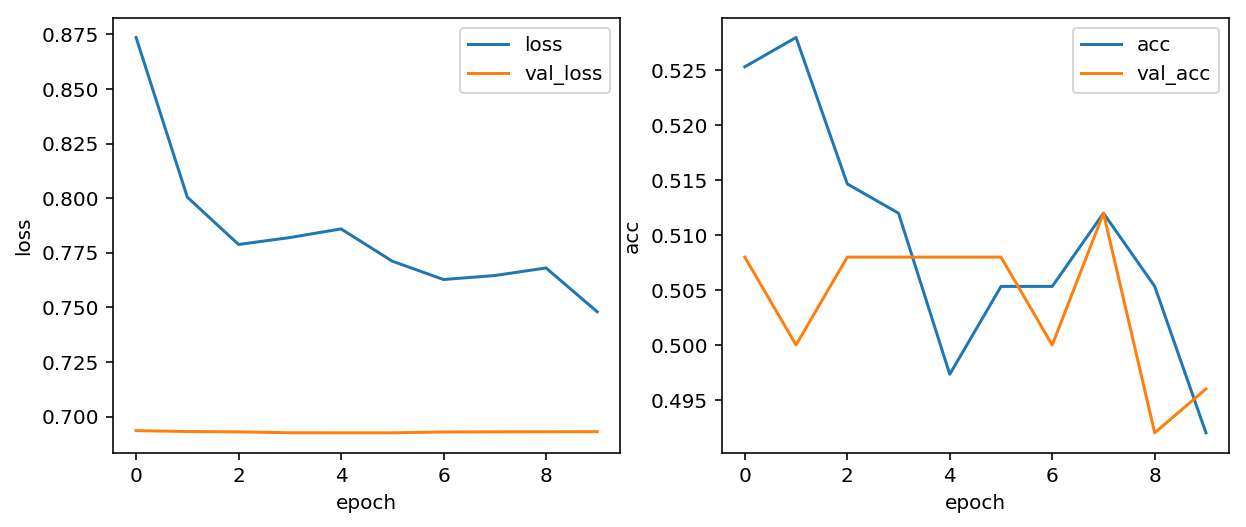

In [7]:
plotLossAndAccuracy(h.history)

### 在测试集上预测图片的分类
是狗还是猫？

100%|██████████| 12500/12500 [00:29<00:00, 417.16it/s]


I am 100.00% sure this is a Dog


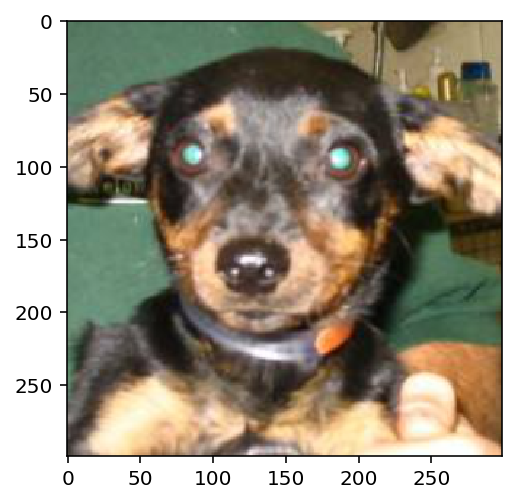

I am 99.98% sure this is a Dog


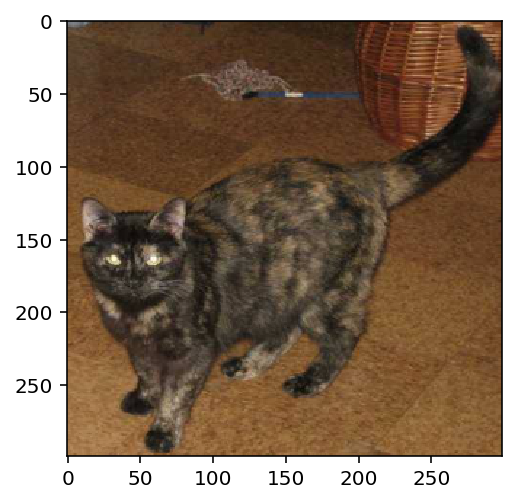

I am 97.64% sure this is a Dog


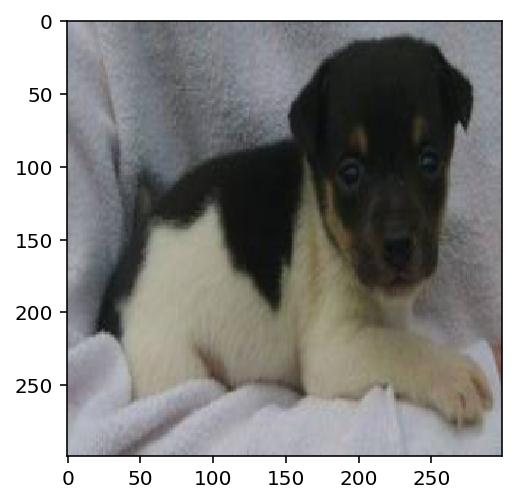

I am 99.88% sure this is a Dog


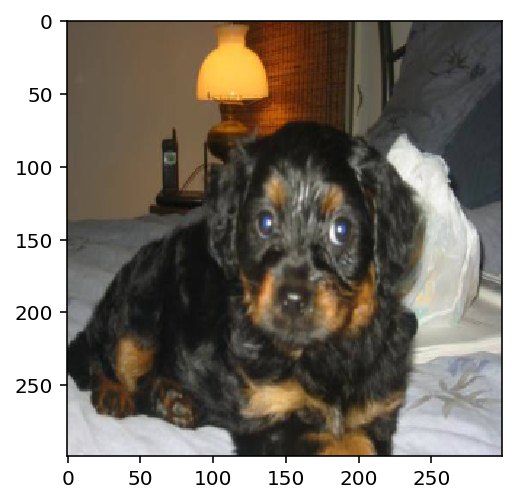

I am 100.00% sure this is a Dog


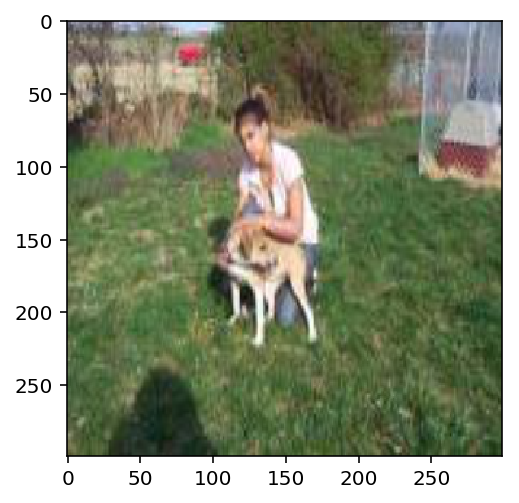

I am 99.85% sure this is a Dog


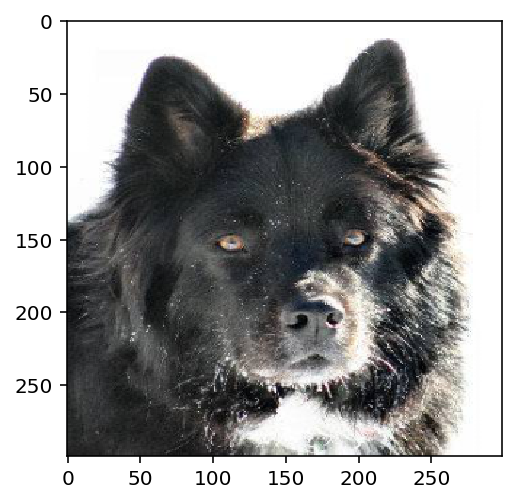

I am 100.00% sure this is a Dog


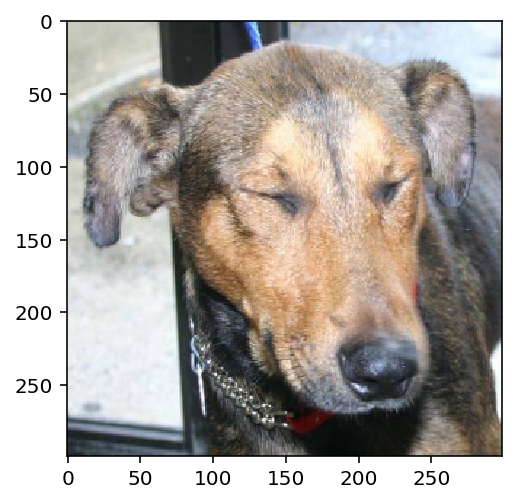

I am 100.00% sure this is a Dog


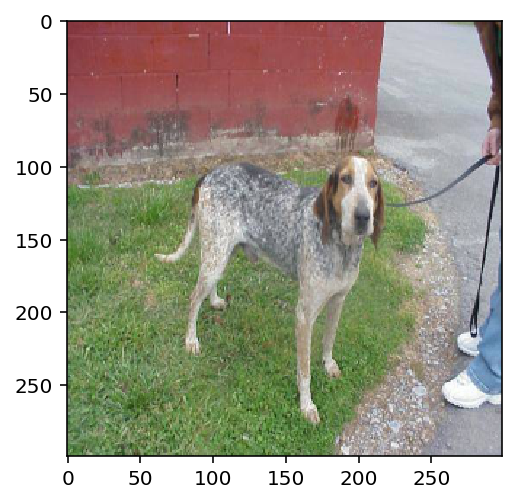

I am 100.00% sure this is a Dog


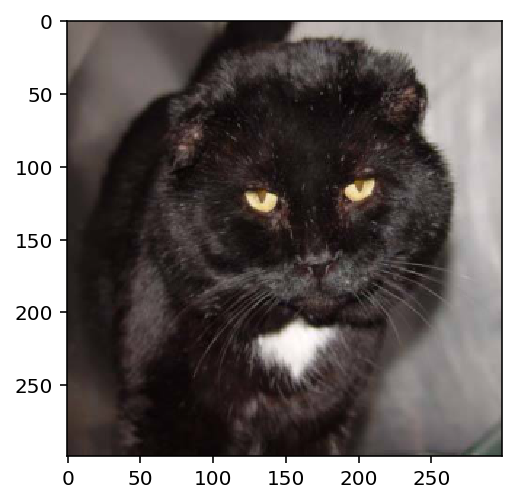

I am 100.00% sure this is a Dog


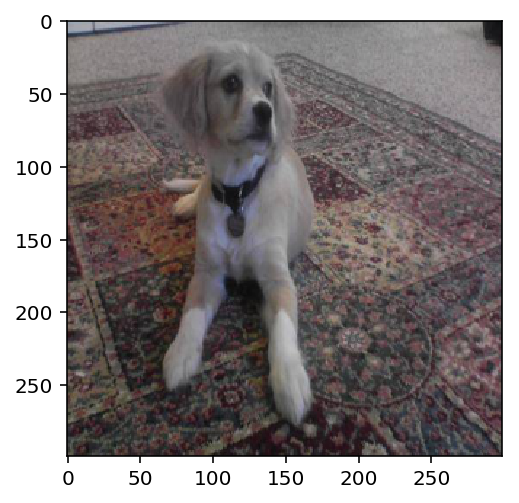

I am 100.00% sure this is a Dog


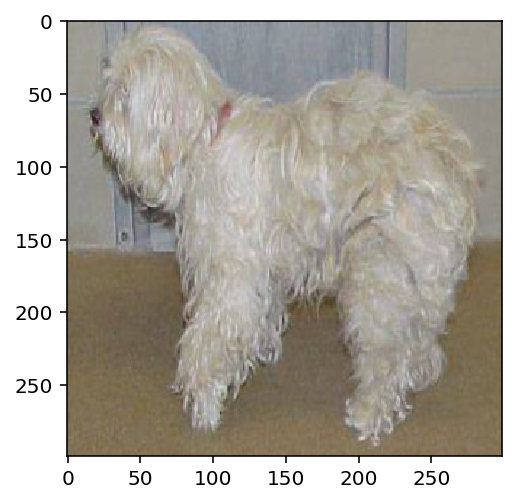

I am 97.89% sure this is a Cat


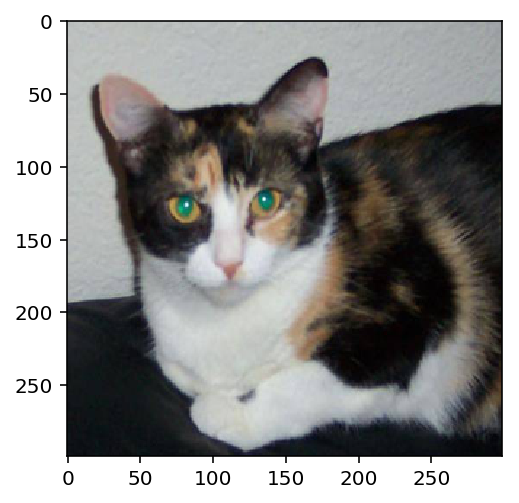

In [8]:
X_test, y_pred = predictOnTestSet(model_simple_conv)
plotPredictions(X_test, y_pred)

In [9]:
model_simple_conv.save_weights('w_simple_conv.h5')